In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData

In [3]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [4]:
sim = MaaSSim.simulators.simulate(config = 'glance.json')

30-10-21 12:25:29-WARNING-Setting up 4h simulation at 2021-10-30 12:54:44 for 2 vehicles and 5 passengers in Nootdorp, Netherlands
30-10-21 12:25:29-INFO--------------------	Starting simulation	-------------------
30-10-21 12:25:29-INFO-pax    0  got to dest at                           2021-10-30 13:01:08
30-10-21 12:25:29-INFO-pax    1  got to dest at                           2021-10-30 13:06:57
30-10-21 12:25:29-INFO-pax    2  got to dest at                           2021-10-30 13:47:16
30-10-21 12:25:29-INFO-pax    3  got to dest at                           2021-10-30 14:02:04
30-10-21 12:25:29-INFO-pax    4  got to dest at                           2021-10-30 14:19:28
30-10-21 12:25:29-INFO-veh    1  quitted shift                            2021-10-30 18:54:43
30-10-21 12:25:29-INFO-veh    2  quitted shift                            2021-10-30 18:54:43
30-10-21 12:25:29-INFO--------------------	Simulation over		-------------------
30-10-21 12:25:29-INFO-queue of requests 0
30-10

In [5]:
params = MaaSSim.utils.get_config('glance.json') 
params

DotMap(NAME='default', city='Nootdorp, Netherlands', nP=5, nV=2, times=DotMap(request=15, transaction=20, pickup=30, dropoff=10, patience=600, pickup_patience=90), speeds=DotMap(walk=1.2, ride=10), t0='15:00', paths=DotMap(G='../../data/graphs/Nootdorp.graphml', skim='../../data/graphs/Nootdorp.csv', _ipython_display_=DotMap(), _repr_mimebundle_=DotMap(), _repr_html_=DotMap(), _repr_markdown_=DotMap(), _repr_svg_=DotMap(), _repr_png_=DotMap(), _repr_pdf_=DotMap(), _repr_jpeg_=DotMap(), _repr_latex_=DotMap(), _repr_json_=DotMap(), _repr_javascript_=DotMap(), dumps='dump'), dist_threshold=100000, big_time=10, sleep=False, simTime=4, demand_structure=DotMap(origins_dispertion=-0.0003, destinations_dispertion=-0.001, temporal_dispertion=0.3, temporal_distribution='uniform'), shareability=DotMap(windows=DotMap(pickup=[-2, 5], dropoff=[-10, 5]), avg_speed=10, shared_discount=0.8, VoT=0.005, WtS=1.2, delay_value=1.5, price=1.5, matching_obj='u_veh', pax_delay=45, horizon=600, max_degree=600, 

In [7]:
params.nP = 5 
params.nV = 3
sim_1 = MaaSSim.simulators.simulate(params=params)

30-10-21 10:59:50-WARNING-Setting up 4h simulation at 2021-10-30 10:22:13 for 3 vehicles and 5 passengers in Nootdorp, Netherlands
30-10-21 10:59:50-INFO--------------------	Starting simulation	-------------------
30-10-21 10:59:50-INFO-pax    0  got to dest at                           2021-10-30 10:28:46
30-10-21 10:59:50-INFO-pax    1  got to dest at                           2021-10-30 10:45:34
30-10-21 10:59:50-INFO-pax    2  got to dest at                           2021-10-30 11:04:58
30-10-21 10:59:50-INFO-pax    3  got to dest at                           2021-10-30 11:22:02
30-10-21 10:59:50-INFO-pax    4  got to dest at                           2021-10-30 12:01:44
30-10-21 10:59:50-INFO-veh    2  quitted shift                            2021-10-30 16:22:12
30-10-21 10:59:50-INFO-veh    3  quitted shift                            2021-10-30 16:22:12
30-10-21 10:59:50-INFO-veh    1  quitted shift                            2021-10-30 16:22:12
30-10-21 10:59:50-INFO------------

In [9]:
sim.vehs[1].veh

pos                           661170821.0
event              driverEvent.ENDS_SHIFT
shift_start                             0
shift_end                           86400
platform                                0
expected_income                       NaN
part_time                               1
beginner                                1
gender                                  1
satisfied                               0
educated                                0
Name: 1, dtype: object

In [11]:
pd.DataFrame(sim.vehs[1].myrides)

,veh,pos,t,event,paxes
0,1,4.499981e+07,0,STARTS_DAY,[]
1,1,4.499981e+07,0,OPENS_APP,[]
2,1,4.499981e+07,0,RECEIVES_REQUEST,[]
3,1,4.499981e+07,15,ACCEPTS_REQUEST,[]
4,1,4.499981e+07,35,IS_ACCEPTED_BY_TRAVELLER,[]
5,1,8.380460e+08,198,ARRIVES_AT_PICKUP,[]
6,1,8.380460e+08,198,MEETS_TRAVELLER_AT_PICKUP,[]
7,1,8.380460e+08,228,DEPARTS_FROM_PICKUP,[0]
8,1,4.500908e+07,459,ARRIVES_AT_DROPOFF,[0]
9,1,4.500908e+07,4967,RECEIVES_REQUEST,[]


In [13]:
sim.inData.vehicles

,pos,event,shift_start,shift_end,platform,expected_income,part_time,beginner,gender,satisfied,educated
veh,,,,,,,,,,,
1,661170821.0,driverEvent.ENDS_SHIFT,0,86400,0,NaN,1,1,1,0,0
2,45029933.0,driverEvent.ENDS_SHIFT,0,86400,0,NaN,1,0,1,1,0


In [15]:
sim.pax[1].pax

pos                                44996083
event        travellerEvent.ARRIVES_AT_DEST
platforms                               [0]
rate                               4.155402
Name: 1, dtype: object

In [17]:
pd.DataFrame(sim.pax[1].rides)

,pax,pos,t,event,veh_id
0,1,44993918,0,STARTS_DAY,NaN
1,1,44993918,4967,REQUESTS_RIDE,NaN
2,1,44993918,4967,RECEIVES_OFFER,NaN
3,1,44993918,4982,ACCEPTS_OFFER,NaN
4,1,44993918,5002,ARRIVES_AT_PICKUP,1.0
5,1,44993918,5048,MEETS_DRIVER_AT_PICKUP,1.0
6,1,44993918,5078,DEPARTS_FROM_PICKUP,1.0
7,1,44996083,5150,ARRIVES_AT_DROPOFF,1.0
8,1,44996083,5160,SETS_OFF_FOR_DEST,NaN
9,1,44996083,5160,ARRIVES_AT_DEST,NaN


In [18]:
sim.inData.passengers

,pos,event,platforms,rate
pax,,,,
0,838045951,NaN,[0],4.736254
1,44993918,NaN,[0],4.155402
2,522125137,NaN,[0],4.631590
3,1432312432,NaN,[0],4.206244
4,1402795341,NaN,[0],4.951925


In [19]:
sim.requests

,pax_id,origin,destination,treq,tdep,ttrav,tarr,tdrop,shareable,schedule_id,dist,ride_id,position,sim_schedule
id,,,,,,,,,,,,,,
1,0,838045951,45009078,2021-10-30 08:58:16,NaN,0 days 00:03:51,2021-10-30 09:02:07,NaN,False,NaN,2313,0,0,node time req_id od 0 N...
2,1,44993918,44996083,2021-10-30 10:21:03,NaN,0 days 00:01:12,2021-10-30 10:22:15,NaN,False,NaN,726,1,0,node time req_id od 0 NaN...
3,2,522125137,45029933,2021-10-30 10:24:45,NaN,0 days 00:01:02,2021-10-30 10:25:47,NaN,False,NaN,626,2,0,node time req_id od 0 N...
4,3,1432312432,510615539,2021-10-30 10:26:09,NaN,0 days 00:04:08,2021-10-30 10:30:17,NaN,False,NaN,2487,3,0,node time req_id od 0 ...
5,4,1402795341,661170821,2021-10-30 11:19:57,NaN,0 days 00:03:17,2021-10-30 11:23:14,NaN,False,NaN,1979,4,0,node time req_id od 0 ...


In [ ]:
params.city = 'Sora, Italy'
MaaSSim.utils.make_config_paths(params, main=None, rel = False)
inData = MaaSSim.utils.download_G(inData, params)
MaaSSim.utils.save_G(inData, params)

In [9]:
#params.city = 'Delft, Netherlands'
params.city = 'Sora, Italy'
params.paths.G = '../../data/graphs/Sora.graphml'
params.paths.skim = '../../data/graphs/Sora.csv'
sim= MaaSSim.simulators.simulate(params=params)

30-10-21 12:28:10-WARNING-Setting up 4h simulation at 2021-10-30 10:53:25 for 2 vehicles and 5 passengers in Sora, Italy
30-10-21 12:28:10-INFO--------------------	Starting simulation	-------------------
30-10-21 12:28:10-INFO-pax    0  got to dest at                           2021-10-30 10:55:25
30-10-21 12:28:10-INFO-pax    1  got to dest at                           2021-10-30 12:36:17
30-10-21 12:28:10-INFO-pax    2  got to dest at                           2021-10-30 13:03:35
30-10-21 12:28:10-INFO-pax    3  got to dest at                           2021-10-30 13:06:37
30-10-21 12:28:10-INFO-pax    4  got to dest at                           2021-10-30 14:05:51
30-10-21 12:28:10-INFO-veh    2  quitted shift                            2021-10-30 16:53:24
30-10-21 12:28:10-INFO-veh    1  quitted shift                            2021-10-30 16:53:24
30-10-21 12:28:10-INFO--------------------	Simulation over		-------------------
30-10-21 12:28:10-INFO-queue of requests 0
30-10-21 12:28:

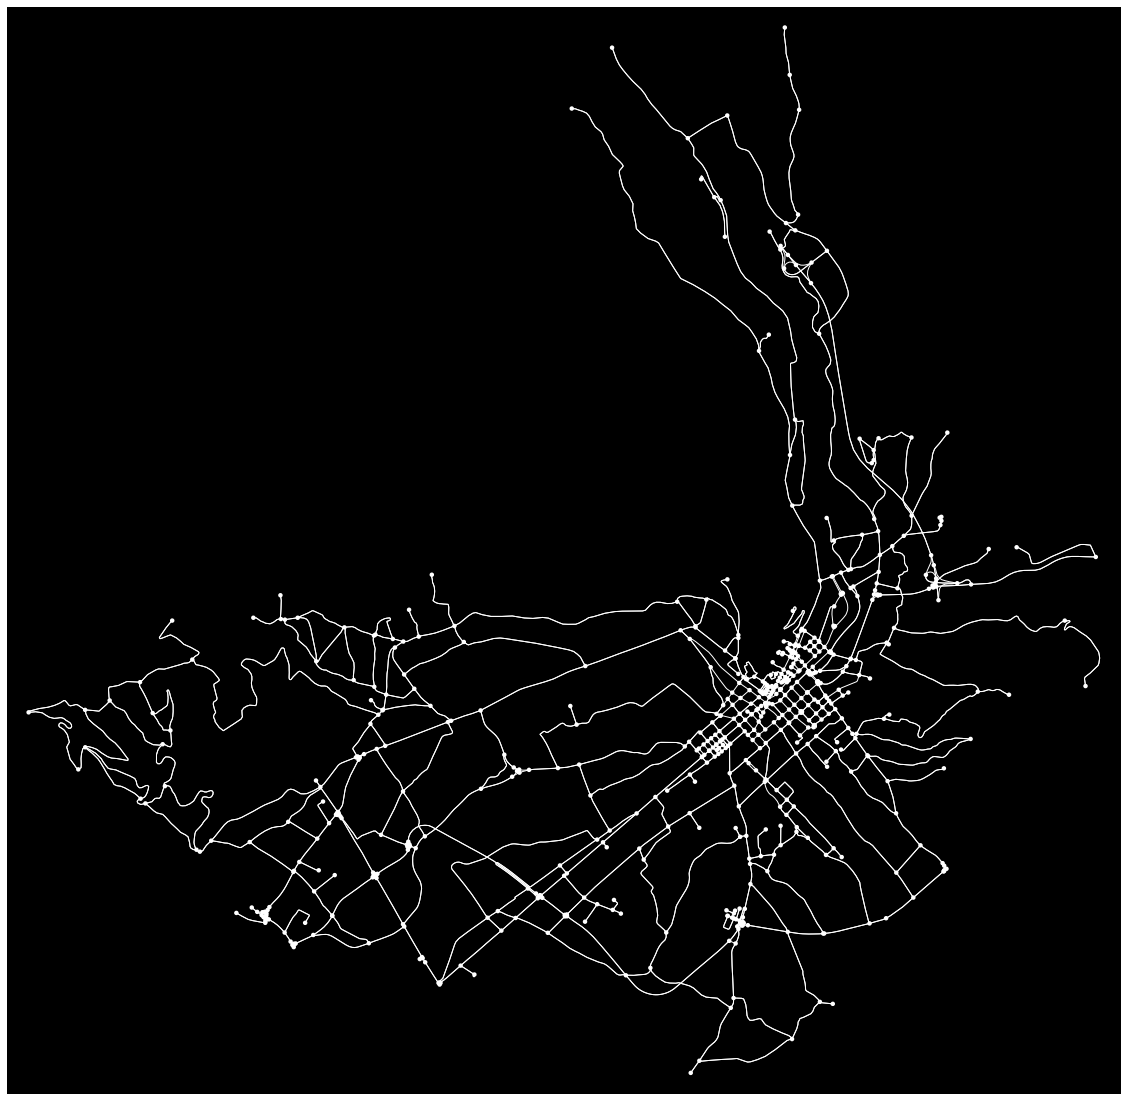

In [10]:
G = sim.inData.G
fig, ax = ox.plot_graph(G, figsize=(20, 20), show=False, close=False, node_size=20, bgcolor='black', edge_color='w')

In [12]:
keys = [print('inData.'+key) for key in sim.inData.keys()]

inData.passengers
inData.vehicles
inData.platforms
inData.requests
inData.schedule
inData.G
inData.nodes
inData.skim
inData.stats
inData.schedules
inData.schedules_queue


OSMNX 